# GoogleStock Prediction Using RNN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

training_set=pd.read_csv('dataset/GoogleStockPrice_Train.csv')
training_set=training_set.iloc[:,1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

X_train= training_set[0:1257]
y_train= training_set[1:1258]

X_train=np.reshape(X_train, (1257 , 1 , 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

/home/admin2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
regressor = Sequential()

regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

regressor.add(Dense( units=1 ))

regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s 356us/step - loss: 0.0675
Epoch 2/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.0617
Epoch 3/200
1257/1257 [==============================] - 0s 32us/step - loss: 0.0590
Epoch 4/200
1257/1257 [==============================] - 0s 34us/step - loss: 0.0565
Epoch 5/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.0540
Epoch 6/200
1257/1257 [==============================] - 0s 35us/step - loss: 0.0514
Epoch 7/200
1257/1257 [==============================] - 0s 31us/step - loss: 0.0488
Epoch 8/200
1257/1257 [==============================] - 0s 31us/step - loss: 0.0463
Epoch 9/200
1257/1257 [==============================] - 0s 30us/step - loss: 0.0437
Epoch 10/200
1257/1257 [==============================] - 0s 33us/step - loss: 0.0412
Epoch 11/200
1257/1257 [==============================] - 0s 30us/step - loss: 0.0387
Epoch 12/200
1257/1257 [==============================] - 0s 3

1257/1257 [==============================] - 0s 34us/step - loss: 2.4979e-04
Epoch 94/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4998e-04
Epoch 95/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5213e-04
Epoch 96/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.5234e-04
Epoch 97/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.4969e-04
Epoch 98/200
1257/1257 [==============================] - 0s 34us/step - loss: 2.5012e-04
Epoch 99/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.5004e-04
Epoch 100/200
1257/1257 [==============================] - 0s 34us/step - loss: 2.4966e-04
Epoch 101/200
1257/1257 [==============================] - 0s 34us/step - loss: 2.5081e-04
Epoch 102/200
1257/1257 [==============================] - 0s 34us/step - loss: 2.4929e-04
Epoch 103/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.4911e-04
Epoch 104/200
1257/

1257/1257 [==============================] - 0s 34us/step - loss: 2.4902e-04
Epoch 184/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.4803e-04
Epoch 185/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4712e-04
Epoch 186/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.4896e-04
Epoch 187/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.4760e-04
Epoch 188/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4662e-04
Epoch 189/200
1257/1257 [==============================] - 0s 32us/step - loss: 2.4654e-04
Epoch 190/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4855e-04
Epoch 191/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.4806e-04
Epoch 192/200
1257/1257 [==============================] - 0s 33us/step - loss: 2.4721e-04
Epoch 193/200
1257/1257 [==============================] - 0s 31us/step - loss: 2.5183e-04
Epoch 194/200

In [15]:
test_set = pd.read_csv('dataset/GoogleStockPrice_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20 , 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

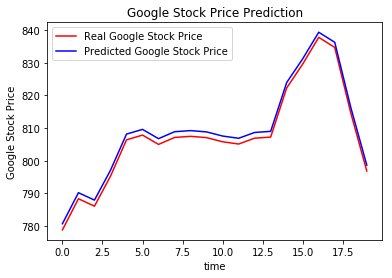

In [16]:
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()